# Final Report

## 1. Variable Analysis

### (1) Outcome Analysis

#### UBS Stock Return 
* **Why:**  We choose stock returns over stock prices because returns are often stationary and suitable for models like ARIMA, GARCH, or machine learning algorithms, while stock prices are typically non-stationary and require transformations for effective modeling.
* **Where:** Get from UBS historical stock price CSV file.   
* **How:** Calculate log returns.
* **Code** `data_prepared/load.py`  --- `load_stock_return(ticker="UBS")`

In [19]:
from data_prepared.load import load_stock_return

UBS_stock_return = load_stock_return("UBS")
UBS_stock_return.head(5)

,Date,UBS log_return
1,2021-01-05,0.022146
2,2021-01-06,0.032989
3,2021-01-07,0.028723
4,2021-01-08,-0.016218
5,2021-01-11,-0.003932


### (2) Predictor Analysis

#### A. Bid-Ask Spread 
* **Why:** Measures liquidity by indicating the difference between buying and selling prices.  
* **Where:** Calculate estimated spread from historical high and low prices in the UBS stock price CSV file.  
* **How:** Use the Corwin and Schultz estimator in Python by calculating α, β, and γ based on the high and low prices in UBS Finance data.
* **Code** `data_prepared/load.py`  --- `load_bid_ask_spread(file_path="data/UBS.csv")`

In [20]:
from data_prepared.load import load_bid_ask_spread

UBS_bid_ask_spread_df = load_bid_ask_spread(file_path="data/UBS.csv")
UBS_bid_ask_spread_df.head(5)

,Date,Bid-Ask Spread
0,2021-01-04,NaN
1,2021-01-05,0.386902
2,2021-01-06,0.803480
3,2021-01-07,0.844275
4,2021-01-08,0.106417


#### B. Trading Volume 
* **Why:** Reflects the total volume of shares traded, indicating market interest and liquidity. 
* **Where:** Get from UBS historical stock price CSV file.  
* **Code** `data_prepared/load.py`  --- `trading_volume(file_path="data/UBS.csv")`

In [21]:
from data_prepared.load import trading_volume

UBS_trading_volume_df = trading_volume(file_path="data/UBS.csv")
UBS_trading_volume_df.head(5)

,Date,volume
0,2021-01-04,4974100
1,2021-01-05,3584400
2,2021-01-06,5241300
3,2021-01-07,4618000
4,2021-01-08,2133900


#### C. SPY500
* **Why:**  Including the SPY500 allows the model to capture the impact of U.S. market movements on UBS stock prices, enabling the analysis to factor in broader market trends and systemic risks associated with the U.S. economy.
* **Where:** The data is included in `data/SPY.csv` of this repository.
* **Code** `data_prepared/load.py`  --- `load_stock_return(ticker="SPY", verbose=verbose)`

In [22]:
import pandas as pd

SPY = pd.read_csv(
    r"C:\Users\DELL\OneDrive\Desktop\IDS789-Financial-Model-Project\data\SPY.csv"
)
SPY.sample(5)

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
359,2022-06-07,408.100006,416.220001,407.609985,415.739990,400.453888,59272400,SPY
66,2021-04-09,408.390015,411.670013,408.260010,411.489990,391.212036,61104600,SPY
97,2021-05-24,417.339996,420.320007,417.079987,419.170013,398.513580,51376700,SPY
652,2023-08-08,448.079987,450.700012,445.269989,448.750000,441.206482,71361300,SPY
381,2022-07-11,385.850006,386.869995,383.500000,384.230011,371.701233,58366900,SPY


#### D. FTSE 100 index
* **Why:**  By including the FTSE 100, the model accounts for regional market influences that might affect UBS, providing a more comprehensive view of how UBS stock prices react to economic conditions in the U.K. and Europe.
* **Where:** The data is included in `data/^FTSE.csv` of this repository.
* **Code** `data_prepared/load.py`  --- `FTSE_stock_return = load_stock_return(ticker="^FTSE", verbose=verbose)`

In [23]:
FTSE = pd.read_csv(
    r"C:\Users\DELL\OneDrive\Desktop\IDS789-Financial-Model-Project\data\^FTSE.csv"
)
FTSE.sample(5)

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
486,2022-12-06,7567.500000,7567.600098,7521.399902,7521.399902,7521.399902,805368600,^FTSE
331,2022-04-26,7380.500000,7463.200195,7380.500000,7386.200195,7386.200195,847986700,^FTSE
404,2022-08-10,7488.200195,7520.700195,7468.600098,7507.100098,7507.100098,766193200,^FTSE
192,2021-10-06,7077.100098,7077.100098,6945.500000,6995.899902,6995.899902,944014100,^FTSE
555,2023-03-16,7344.500000,7458.600098,7331.500000,7410.000000,7410.000000,1196884100,^FTSE


#### E. CBOE Volatility Index (^VIX)
* **Why:**  The return of ^VIX, reflecting percentage changes in volatility, is more relevant for financial forecasting as it allows for better comparisons across periods and robust analysis, while ^VIX itself serves as a leading indicator of market sentiment and risk, making it a valuable predictor for changes in asset prices.
* **Where:** Get from CBOE Volatility Index CSV file.  
* **Code** `data_prepared/load.py`  --- `load_cboe_vix(file_path="data/^VIX.csv")`

In [24]:
from data_prepared.load import load_cboe_vix

UBS_trading_volume_df = load_cboe_vix(file_path="data/^VIX.csv")
UBS_trading_volume_df.head(5)

,Date,VIX
1,2021-01-05,-0.062341
2,2021-01-06,-0.010712
3,2021-01-07,-0.113951
4,2021-01-08,-0.036881
5,2021-01-11,0.110542


#### F. EUR/CHF
* **Why:**  Returns provide normalized measures of changes in the EUR/CHF exchange rate, enabling easier interpretation and comparison over time, while the exchange rate itself reflects economic stability and risk perceptions in Europe and Switzerland, making it a valuable predictor for models addressing European market dependencies and global financial dynamics.
* **Where:** Get from EUR/CHF CSV file.  
* **Code** `data_prepared/load.py`  --- `load_eur_chf(file_path="data/EURCHF=X.csv")`

In [25]:
from data_prepared.load import load_eur_chf

UBS_trading_volume_df = load_eur_chf(file_path="data/EURCHF=X.csv")
UBS_trading_volume_df.head(5)

,Date,EURCHF
1,2021-01-05,-0.001906
2,2021-01-06,0.000407
3,2021-01-07,0.003124
4,2021-01-08,0.002388
5,2021-01-11,-0.004133


#### H. Oil Prices
* **Why:**  Use returns instead of prices to ensure stationary of the data, which is crucial for effective modeling. Oil prices are a key economic indicator that affects global market conditions and company operators.
* **Where:** Get from Crude Oil Futures CSV file.
* **How:**  Calculate log returns (`log(current/previous)`).
* **Code** `data_prepared/load.py`  --- `load_oil_prices(file_path="data/CL=F.csv")`

In [26]:
from data_prepared.load import load_oil_prices

UBS_oil_prices_df = load_oil_prices(file_path="data/CL=F.csv")
UBS_oil_prices_df.head(5)

,Date,oil_log_return
1,2021-01-05,0.047369
2,2021-01-06,0.013922
3,2021-01-07,0.003942
4,2021-01-08,0.027362
5,2021-01-11,0.000191


#### I. Gold Prices
* **Why:**  Use returns instead of prices to ensure stationary of the data, which is crucial for effective modeling. Gold acts as a hedge against economic risk and market volatility. 
* **Where:** Get from COMEX Gold Futures CSV file.
* **How:**  Calculate log returns (`log(current/previous)`).
* **Code** `data_prepared/load.py`  --- `load_gold_prices(file_path="data/GC=F.csv")`

In [27]:
from data_prepared.load import load_gold_prices

UBS_gold_prices_df = load_gold_prices(file_path="data/GC=F.csv")
UBS_gold_prices_df.head(5)

,Date,gold_log_return
1,2021-01-05,0.004105
2,2021-01-06,-0.023734
3,2021-01-07,0.002828
4,2021-01-08,-0.041753
5,2021-01-11,0.008416


#### J.
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### K.
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

## 2. Model Prepared

defining time period(T), using training dataset(R) to construct models, and using testing datasets(P) to evaluate models.  
T=2021-01-04 ~2024-01-05  
R=2021-01-04 ~2023-01-02  
P= 2023-01-02~2024-01-05  


In [31]:
import pandas as pd

training_dataset = pd.read_csv("data_prepared/training_dataset.csv")
testing_dataset = pd.read_csv("data_prepared/testing_dataset.csv")
training_dataset.head(5)
testing_dataset.head(5)

,Date,UBS log_return,Bid-Ask Spread,volume,VIX,EURCHF,oil_log_return,gold_log_return,DB log_return,MS log_return,SPY log_return,^FTSE log_return
0,2023-01-04,0.037779,0.755705,2567800,-0.039640,0.000426,-0.054631,0.007096,0.063684,0.010791,0.007691,0.004109
1,2023-01-05,-0.006624,0.756940,1910000,0.020239,-0.001247,0.011330,-0.009763,-0.027622,-0.008460,-0.011479,0.006347
2,2023-01-06,0.016730,2.557751,2614200,-0.061042,-0.001126,0.001356,0.015896,0.024411,0.018908,0.022673,0.008609
3,2023-01-09,0.005015,1.437562,2929800,0.038984,0.002799,0.011590,0.004549,0.000000,0.000913,-0.000567,0.003293
4,2023-01-10,0.012429,0.276420,1786900,-0.065358,0.000840,0.006544,-0.000588,0.015158,0.014500,0.006988,-0.003943


## 3. Model Building

### 3.1 ARIMA(p,d,q) model

ADF Statistic: -16.023480794083284
p-value: 6.167754488960538e-29
The series is stationary.
Finding the best ARIMAX parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2454.180, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-359.536, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2458.570, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2458.713, Time=0.56 sec


c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2455.324, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2457.865, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2456.171, Time=0.66 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2456.716, Time=0.72 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 5.101 seconds
Best ARIMAX parameters: (0, 0, 1)


c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


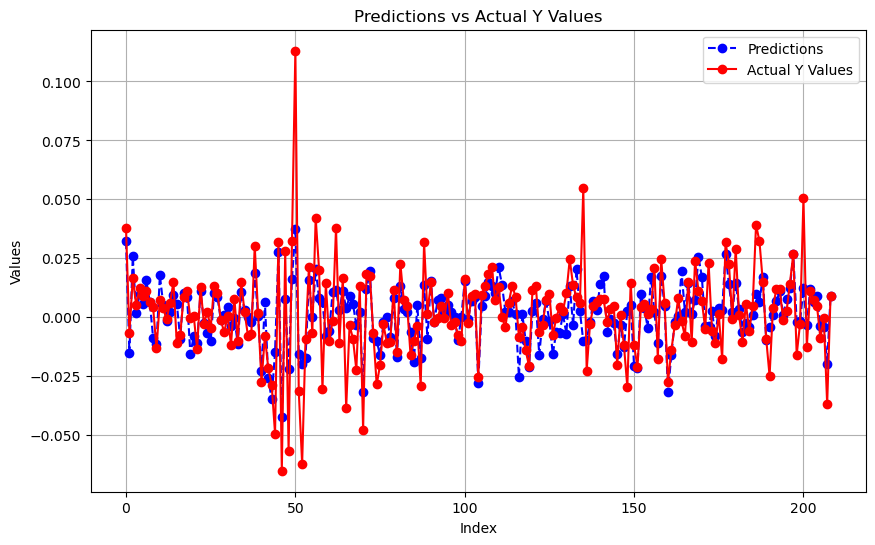

Mean Squared Forecast Error: 0.000181
ARIMAX Model MSFE:  0.0001810400111192992


In [29]:
from model.arimax import check_stationarity, arimax_model
from model.lib import plot_predictions_vs_actual, msfe

# stationary assumption
y_train = training_dataset["UBS log_return"]
check_stationarity(y_train)

arimax_predictions_df = arimax_model(training_dataset, testing_dataset)

# plot
plot_predictions_vs_actual(arimax_predictions_df, testing_dataset)

# MSFE
arimax_msfe = msfe(arimax_predictions_df, testing_dataset)
print("ARIMAX Model MSFE: ", arimax_msfe)

### 3.2 Bayesian Model

In [30]:
from model.bayesian import bayesian_model
from model.lib import plot_predictions_vs_actual, msfe

bay_predictions_df = bayesian_model(training_dataset, testing_dataset)

# plot
plot_predictions_vs_actual(bay_predictions_df, testing_dataset)

# MSFE
bay_msfe = msfe(bay_predictions_df, testing_dataset)
print("Bayesian Model MSFE: ", bay_msfe)

ModuleNotFoundError: No module named 'pymc'

### 3.3 Decision Tree

The decision tree model was applied to predict the UBS log returns using the features extracted from the dataset. While the model yielded relatively low Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating a reasonable fit to the training data, the **R² score** was not particularly high, at **0.386**. 

##### Key Observations:
1. **Low MSE and MAE**:
   - The low error metrics suggest that the model performs well in minimizing the absolute and squared differences between actual and predicted values. However, these metrics alone do not guarantee the model's ability to explain the variance in the data.

2. **Moderate R² Score**:
   - An R² score of 0.386 indicates that the decision tree model explains approximately 38.6% of the variance in UBS log returns. This highlights that there is significant variance in the data not captured by the model.

3. **Challenges in Improvement**:
   - Various feature engineering techniques were attempted, including:
     - Adding lagged values of UBS log returns as predictors.
     - Extracting date components (day, month, year) to consider potential seasonal effects.
     - Creating interaction terms, such as:
       - **Spread Volume**: The product of bid-ask spread and volume.
       - **VIX Oil**: The product of oil log return and VIX.
   - Despite these efforts, there was no significant improvement in the R² score.

4. **Hyperparameter Tuning**:
   - GridSearchCV was used to optimize the hyperparameters of the decision tree. However, the tuned model did not yield better performance in terms of the R² score.

##### Conclusion:
The decision tree model provides a baseline for predicting UBS log returns but may not be the best-suited algorithm for this dataset. Its limited ability to explain variance suggests that more sophisticated ensemble methods or additional features might be necessary for improvement.


Mean Absolute Error (MAE): 0.0100
Mean Squared Forecast Error (MSFE): 0.0002
R² Score: 0.3861


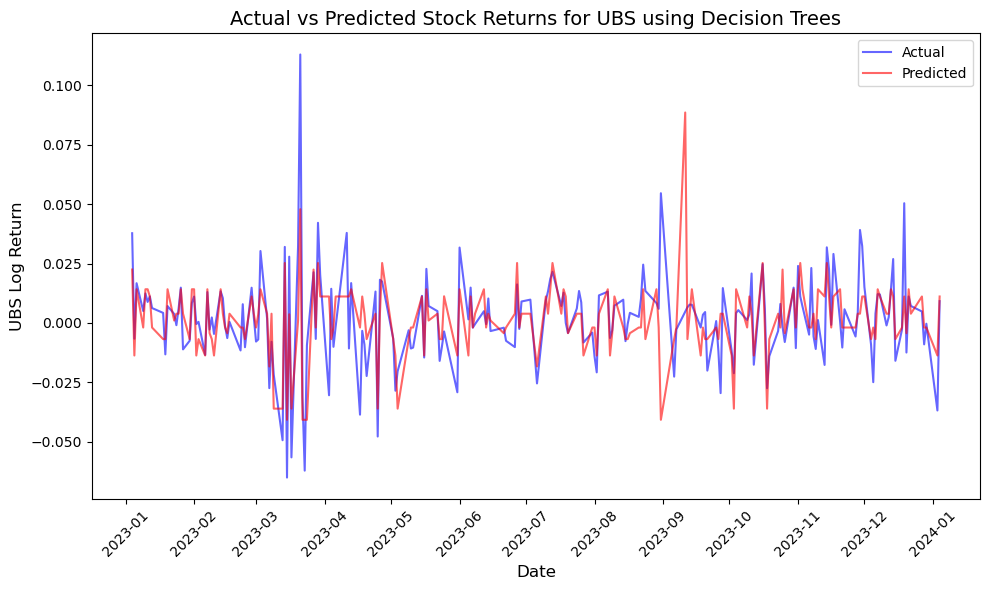

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure Date is in datetime format
training_dataset["Date"] = pd.to_datetime(training_dataset["Date"])
testing_dataset["Date"] = pd.to_datetime(testing_dataset["Date"])

# target-explanatory variables split
X_train = training_dataset.drop(columns=["UBS log_return", "Date"])
y_train = training_dataset["UBS log_return"]
X_test = testing_dataset.drop(columns=["UBS log_return", "Date"])
y_test = testing_dataset["UBS log_return"]

# Train the Decision Tree model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Forecast Error (MSFE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10, 6))

# Plot Actual values vs Predicted values
plt.plot(testing_dataset["Date"], y_test, label="Actual", color="blue", alpha=0.6)
plt.plot(testing_dataset["Date"], y_pred, label="Predicted", color="red", alpha=0.6)

# Format x-axis for dates (using DateFormatter for readability)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add labels and title
plt.title("Actual vs Predicted Stock Returns for UBS using Decision Trees", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("UBS Log Return", fontsize=12)
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()

### 3.4 Gradient Boosting Machines (GBM)

Mean Squared Error (MSE): 0.000192
Root Mean Squared Error (RMSE): 0.013846
R-squared Score: 0.506155

Feature Importance:
            feature  importance
6     DB log_return    0.455480
1            volume    0.172711
7     MS log_return    0.115245
8    SPY log_return    0.073310
5   gold_log_return    0.042965
0    Bid-Ask Spread    0.035680
2               VIX    0.032045
9  ^FTSE log_return    0.027640
4    oil_log_return    0.022780
3            EURCHF    0.022144


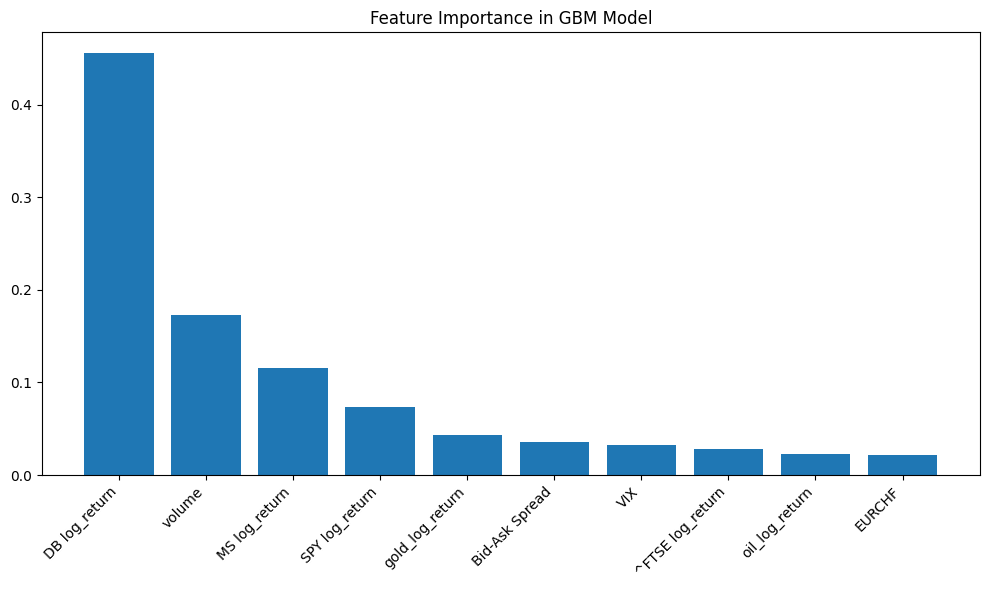

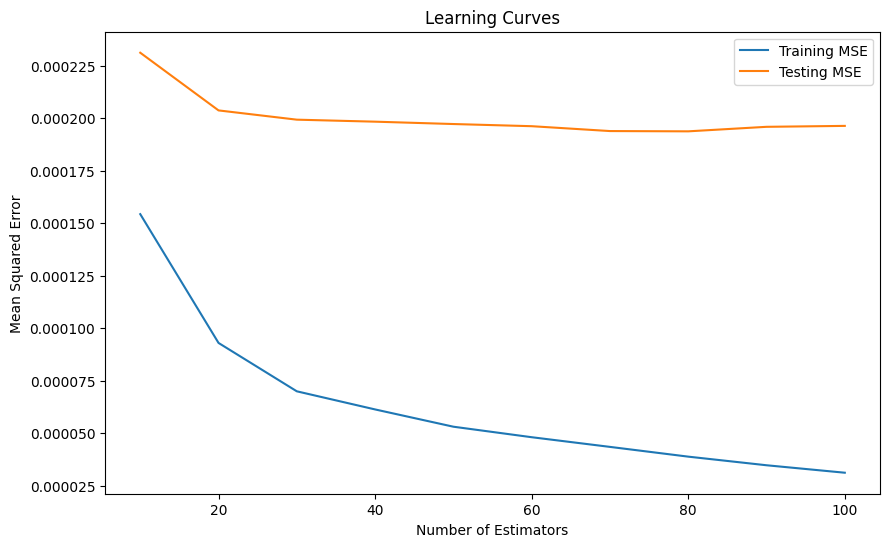

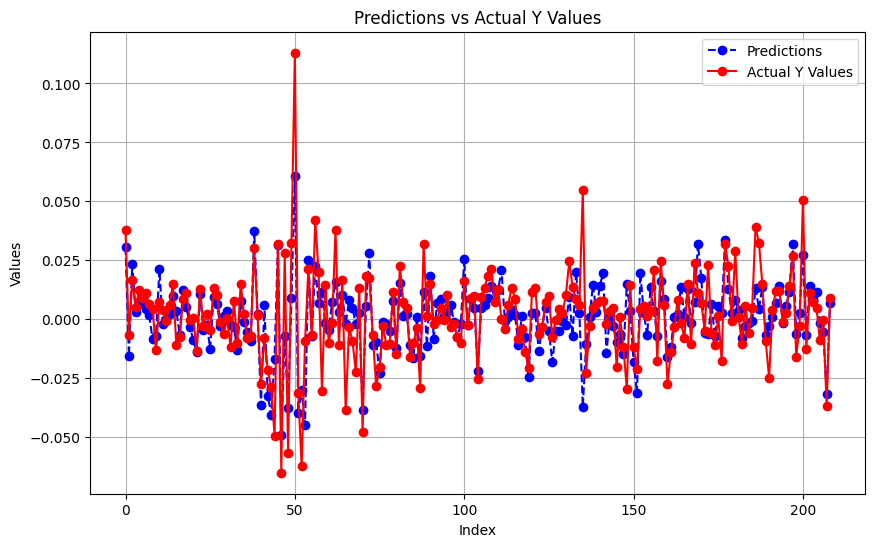

Mean Squared Forecast Error: 0.000192
GBM Model MSFE:  0.00019172030564769863


In [ ]:
from model.gbm import gbm_model
from model.lib import plot_predictions_vs_actual, msfe

gbm_predictions_df = gbm_model(training_dataset, testing_dataset)

# plot
plot_predictions_vs_actual(gbm_predictions_df, testing_dataset)

# MSFE
gbm_msfe = msfe(gbm_predictions_df, testing_dataset)
print("GBM Model MSFE: ", gbm_msfe)

### 3.5 Neural Networks 

## 4. Forecast accuracy measures